<h1 style align="center"> Network Intrusion Detection </h1>
<hr>
<h5 style align="right"> Work Done by : Marah Baccari & Wissem Bellara  </h3>

<h2> I. Business Understanding</h2>

<p>We have a network intrusion detection dataset, commonly used for classifying network connections as either 'Normal' or 'Anomalous' (indicating a potential attack). Each row in this dataset corresponds to a network connection, and the 'class' column is the target variabl that we're trying to predict. </p>

In [2]:
%matplotlib inline
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
import pingouin as pg

In [3]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

<h2>II. Data Understanding </h2>

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [5]:
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate    class
0         0           tcp  ftp_data   SF        491          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0      2          2          0.0              0.0          0.0              0.0           1.00           0.00                0.00             150                  25                    0.17                    0.03                         0.17                         0.00                  0.00                      0.00                  0.05                      0.00   normal
1         0           udp     other   SF        146          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0     13          1          0.0              0.0          0.0              0.0           0.08           0.15                0.00             255                   1                    0.00                    0.60                         0.88                         0.00                  0.00                      0.00                  0.00                      0.00   normal
2         0           tcp   private   S0          0          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0    123          6          1.0              1.0          0.0              0.0           0.05           0.07                0.00             255                  26                    0.10                    0.05                         0.00                         0.00                  1.00                      1.00                  0.00                      0.00  anomaly
3         0           tcp      http   SF        232       8153     0               0       0    0                  0          1                0           0             0         0                   0           0                 0                  0              0               0      5          5          0.2              0.2          0.0              0.0           1.00           0.00                0.00              30                 255                    1.00                    0.00                         0.03                         0.04                  0.03                      0.01                  0.00                      0.01   normal
4         0           tcp      http   SF        199        420     0               0       0    0                  0          1                0           0             0         0                   0           0                 0                  0              0               0     30         32          0.0              0.0          0.0              0.0           1.00           0.00                0.09             255                 255                    1.00                    0.00                         0.00                         0.00                  0.00                      0.00                  0.00                      0.00   normal

In [6]:
train.shape

(25192, 42)

In [50]:
train.isnull().sum().sum()

0

In [8]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<b>Let's understand our columns:</b> </b>
<ol>
<li><b> duration:</b> The length (in seconds) of the connection. It measures the time duration for which the connection was active.</li><br>

<li><b> protocol_type:</b> The type of network protocol used for the connection (e.g., TCP, UDP, ICMP).</li><br>

<li><b> service:</b> The network service on the destination host (e.g., http, ftp, telnet).</li><br>

<li><b> flag:</b> A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").</li><br>

<li><b> src_bytes:</b> The number of data bytes from the source to the destination during the connection.</li><br>

<li><b> dst_bytes:</b> The number of data bytes from the destination to the source during the connection.</li><br>

<li><b> land:</b> Indicates if the connection is from/to the same host/land. It's a binary variable.</li><br>

<li><b> wrong_fragment:</b> The number of "wrong" fragments in the connection.</li><br>

<li><b> urgent:</b> The number of urgent packets in the connection.</li><br>

<li><b> hot:</b> The number of "hot" indicators in the connection.</li><br>

<li><b> num_failed_logins:</b> The number of failed login attempts.</li><br>

<li><b> logged_in:</b> Indicates if the user is logged in (binary, 1 for yes, 0 for no).</li><br>

<li><b> num_compromised:</b> The number of compromised conditions.</li><br>

<li><b> root_shell:</b> Indicates if the root shell is obtained (binary).</li><br>

<li><b> su_attempted:</b> Indicates if an "su root" command was attempted (binary).</li><br>

<li><b> num_root:</b> The number of root accesses.</li><br>

<li><b> num_file_creations:</b> The number of file creations.</li><br>

<li><b> num_shells:</b> The number of shell prompts.</li><br>

<li><b> num_access_files:</b> The number of operations on access control files.</li><br>

<li><b> num_outbound_cmds:</b> The number of outbound commands in an ftp session.</li><br>

<li><b> is_host_login:</b> Indicates if the login belongs to the "host" login type.</li><br>

<li><b> is_guest_login:</b> Indicates if the login is a "guest" login.</li><br>

<li><b> count:</b> The number of connections to the same host as the current connection in the past two seconds.</li><br>

<li><b> srv_count:</b> The number of connections to the same service as the current connection in the past two seconds.</li><br>

<li><b> serror_rate:</b> The percentage of connections that have "SYN" errors.</li><br>

<li><b> srv_serror_rate:</b> The percentage of connections to the same service with "SYN" errors.</li><br>

<li><b> rerror_rate:</b> The percentage of connections that have "REJ" errors.</li><br>

<li><b> srv_rerror_rate:</b> The percentage of connections to the same service with "REJ" errors.</li><br>

<li><b> same_srv_rate:</b> The percentage of connections to the same service.</li><br>

<li><b> diff_srv_rate:</b> The percentage of connections to different services.</li><br>

<li><b> srv_diff_host_rate:</b> The percentage of connections to different hosts among the same service.</li><br>

<li><b> dst_host_count:</b> The number of connections to the same destination host.</li><br>

<li><b> dst_host_srv_count:</b> The number of connections to the same service on the destination host.</li><br>

<li><b> dst_host_same_srv_rate:</b> The percentage of connections to the same service on the destination host.</li><br>

<li><b> dst_host_diff_srv_rate:</b> The percentage of connections to different services on the destination host.</li><br>

<li><b> dst_host_same_src_port_rate:</b> The percentage of connections with the same source port to the same destination host.</li><br>

<li><b> dst_host_srv_diff_host_rate:</b> The percentage of connections with different hosts to the same service on the destination host.</li><br>

<li><b> dst_host_serror_rate:</b> The percentage of connections that have "SYN" errors to the destination host.</li><br>

<li><b> dst_host_srv_serror_rate:</b> The percentage of connections to the same service with "SYN" errors on the destination host.</li><br>

<li><b> dst_host_rerror_rate:</b> The percentage of connections that have "REJ" errors to the destination host.</li><br>

<li><b> dst_host_srv_rerror_rate:</b> The percentage of connections to the same service with "REJ" errors on the destination host.</li><br>

<li><b> class:</b> This is the target variable that indicates whether the connection is 'Normal' or 'Anomalous' (i.e., an attack).</li><br>

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [10]:
train.duplicated().sum()

0

In [11]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [12]:
#Summary Statistics
train.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment       urgent           hot  num_failed_logins     logged_in  num_compromised    root_shell  su_attempted      num_root  num_file_creations    num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login         count     srv_count   serror_rate  srv_serror_rate   rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000  25192.00000  25192.000000       25192.000000  25192.000000     25192.000000  25192.000000  25192.000000  25192.000000        25192.000000  25192.000000      25192.000000            25192.0        25192.0    25192.000000  25192.000000  25192.000000  25192.000000     25192.000000  25192.000000     25192.000000   25192.000000   25192.000000        25192.000000    25192.000000        25192.000000            25192.000000            25192.000000                 25192.000000                 25192.000000          25192.000000              25192.000000          25192.000000              25192.000000
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738      0.00004      0.198039           0.001191      0.394768         0.227850      0.001548      0.001350      0.249841            0.014727      0.000357          0.004327                0.0            0.0        0.009130     84.591180     27.698754      0.286338         0.283762      0.118630         0.120260       0.660559       0.062363            0.095931      182.532074          115.063036                0.519791                0.082539                     0.147453                     0.031844              0.285800                  0.279846              0.117800                  0.118769
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221      0.00630      2.154202           0.045418      0.488811        10.417352      0.039316      0.048785     11.500842            0.529602      0.018898          0.098524                0.0            0.0        0.095115    114.673451     72.468242      0.447312         0.447599      0.318745         0.322335       0.439637       0.178550            0.256583       98.993895          110.646850                0.448944                0.187191                     0.308367                     0.110575              0.445316                  0.446075              0.305869                  0.317333
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000      0.00000      0.000000           0.000000      0.000000         0.000000      0.000000      0.000000      0.000000            0.000000      0.000000          0.000000                0.0            0.0        0.000000      1.000000      1.000000      0.000000         0.000000      0.000000         0.000000       0.000000       0.000000            0.000000        0.000000            0.000000                0.000000                0.000000                     0.000000                     0.000000              0.000000                  0.000000              0.000000                  0.000000
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000      0.00000      0.000000           0.000000      0.000000         0.000000      0.000000      0.000000      0.000000            0.000000      0.000000          0.000000                0.0            0.0        0.000000      2.000000      2.000000      0.000000         0.000000      0.000000         0.000000       0.090000       0.000000            0.000000       84.000000           10.000000                0.050000                0.000000                     0.000000                     0.000000              0.000000                  0.0000

The dataset exhibits a shape of (25192, 42), indicating 25,192 rows and 42 columns. A glance at train.info() shows that all columns have non-null values, eliminating the need for imputation. Data types are appropriately assigned, including integers, floats, and objects. No duplicated rows are present in the dataset (train.duplicated().sum(): 0). The target variable, 'class,' demonstrates a balanced distribution, with 'normal' occurring 13,449 times and 'anomaly' occurring 11,743 times (train['class'].value_counts(): normal 13449, anomaly 11743). This balance is crucial for training a machine learning model, preventing bias towards the majority class. In summary, the dataset appears well-prepared for further exploration, preprocessing, and model training for network intrusion detection.

In [13]:
''' Encoding categorical data, for further exploring (Visulaization)'''
train_transformed = train.copy()
test_transformed = test.copy()
lb=LabelEncoder()
train_transformed['protocol_type']=lb.fit_transform(train_transformed['protocol_type'])
train_transformed['service']=lb.fit_transform(train_transformed['service'])
train_transformed['flag']=lb.fit_transform(train_transformed['flag'])
train_transformed['class']=lb.fit_transform(train_transformed['class'])
test_transformed['protocol_type']=lb.fit_transform(test_transformed['protocol_type'])
test_transformed['service']=lb.fit_transform(test_transformed['service'])
test_transformed['flag']=lb.fit_transform(test_transformed['flag'])

In [14]:
''' Normalizing some numerical columns that have large gaps '''
# Select the column to be standardized
column_to_scale = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected column
train_transformed[column_to_scale] = scaler.fit_transform(train_transformed[column_to_scale])
test_transformed[column_to_scale] = scaler.fit_transform(test_transformed[column_to_scale])

In [15]:
# Revise the dataset after the modifications
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate    class
0         0           tcp  ftp_data   SF        491          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0      2          2          0.0              0.0          0.0              0.0           1.00           0.00                0.00             150                  25                    0.17                    0.03                         0.17                         0.00                  0.00                      0.00                  0.05                      0.00   normal
1         0           udp     other   SF        146          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0     13          1          0.0              0.0          0.0              0.0           0.08           0.15                0.00             255                   1                    0.00                    0.60                         0.88                         0.00                  0.00                      0.00                  0.00                      0.00   normal
2         0           tcp   private   S0          0          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0                  0              0               0    123          6          1.0              1.0          0.0              0.0           0.05           0.07                0.00             255                  26                    0.10                    0.05                         0.00                         0.00                  1.00                      1.00                  0.00                      0.00  anomaly
3         0           tcp      http   SF        232       8153     0               0       0    0                  0          1                0           0             0         0                   0           0                 0                  0              0               0      5          5          0.2              0.2          0.0              0.0           1.00           0.00                0.00              30                 255                    1.00                    0.00                         0.03                         0.04                  0.03                      0.01                  0.00                      0.01   normal
4         0           tcp      http   SF        199        420     0               0       0    0                  0          1                0           0             0         0                   0           0                 0                  0              0               0     30         32          0.0              0.0          0.0              0.0           1.00           0.00                0.09             255                 255                    1.00                    0.00                         0.00                         0.00                  0.00                      0.00                  0.00                      0.00   normal

In [16]:
''' Create a function to check for columns that have only value '''
def CalcVals(df, value) :
    """returns a list of columns containing only 'value' """
    cols=[]
    for i in df.columns:
        if train[i].sum() == value:
            cols.append(i)
    return cols

In [17]:
CalcVals(train , 0)

['num_outbound_cmds', 'is_host_login']

In [18]:
def minmax (df) :
    minmax={}
    for i in df.columns :
        minmax[i]=( ( df[i].min() , df[i].max() ) )
    return minmax

In [19]:
minmax(train)

{'duration': (0, 42862),
 'protocol_type': ('icmp', 'udp'),
 'service': ('IRC', 'whois'),
 'flag': ('OTH', 'SH'),
 'src_bytes': (0, 381709090),
 'dst_bytes': (0, 5151385),
 'land': (0, 1),
 'wrong_fragment': (0, 3),
 'urgent': (0, 1),
 'hot': (0, 77),
 'num_failed_logins': (0, 4),
 'logged_in': (0, 1),
 'num_compromised': (0, 884),
 'root_shell': (0, 1),
 'su_attempted': (0, 2),
 'num_root': (0, 975),
 'num_file_creations': (0, 40),
 'num_shells': (0, 1),
 'num_access_files': (0, 8),
 'num_outbound_cmds': (0, 0),
 'is_host_login': (0, 0),
 'is_guest_login': (0, 1),
 'count': (1, 511),
 'srv_count': (1, 511),
 'serror_rate': (0.0, 1.0),
 'srv_serror_rate': (0.0, 1.0),
 'rerror_rate': (0.0, 1.0),
 'srv_rerror_rate': (0.0, 1.0),
 'same_srv_rate': (0.0, 1.0),
 'diff_srv_rate': (0.0, 1.0),
 'srv_diff_host_rate': (0.0, 1.0),
 'dst_host_count': (0, 255),
 'dst_host_srv_count': (0, 255),
 'dst_host_same_srv_rate': (0.0, 1.0),
 'dst_host_diff_srv_rate': (0.0, 1.0),
 'dst_host_same_src_port_rate

In [20]:
train = train.drop(CalcVals(train , 0), axis=1) #Removing Columns containing only 0
test = test.drop(CalcVals(train , 0), axis=1) #Removing Columns containing only 0

<h2> III. Data Visualization</h2>

In [21]:
# Personnalized colors
purp = ["#9659f4", "#5ccffb" , "#4335af" , "#c1c1c1"  , "#a0fdf1"]
sns.set_style({'axes.grid' : False})
sns.set_palette(purp)

In [22]:
train.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate    class
0         0           tcp    ftp_data   SF        491          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0               0      2          2          0.0              0.0          0.0              0.0           1.00           0.00                0.00             150                  25                    0.17                    0.03                         0.17                         0.00                  0.00                      0.00                  0.05                      0.00   normal
1         0           udp       other   SF        146          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0               0     13          1          0.0              0.0          0.0              0.0           0.08           0.15                0.00             255                   1                    0.00                    0.60                         0.88                         0.00                  0.00                      0.00                  0.00                      0.00   normal
2         0           tcp     private   S0          0          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0               0    123          6          1.0              1.0          0.0              0.0           0.05           0.07                0.00             255                  26                    0.10                    0.05                         0.00                         0.00                  1.00                      1.00                  0.00                      0.00  anomaly
3         0           tcp        http   SF        232       8153     0               0       0    0                  0          1                0           0             0         0                   0           0                 0               0      5          5          0.2              0.2          0.0              0.0           1.00           0.00                0.00              30                 255                    1.00                    0.00                         0.03                         0.04                  0.03                      0.01                  0.00                      0.01   normal
4         0           tcp        http   SF        199        420     0               0       0    0                  0          1                0           0             0         0                   0           0                 0               0     30         32          0.0              0.0          0.0              0.0           1.00           0.00                0.09             255                 255                    1.00                    0.00                         0.00                         0.00                  0.00                      0.00                  0.00                      0.00   normal
5         0           tcp     private  REJ          0          0     0               0       0    0                  0          0                0           0             0         0                   0           0                 0               0    121    

<h3> 1. Univariate Visualization</h3> <hr>
Univariate visualization involves exploring and understanding the distribution of individual variables in your dataset. It helps you grasp the characteristics of each feature without considering the relationship with other variables. Common univariate visualization techniques include histograms, box plots, and kernel density plots for numerical data, and bar charts or count plots for categorical data. Let's go through some examples:

<h4> a. Numerical Features</h4>

- <strong>Histograms : </strong> <br><hr>
For numerical features like duration, src_bytes, dst_bytes, etc., we can create histograms to visualize the distribution of values. This helps us understand the range, central tendency, and spread of each numerical variable.

<AxesSubplot: xlabel='same_srv_rate', ylabel='Count'>

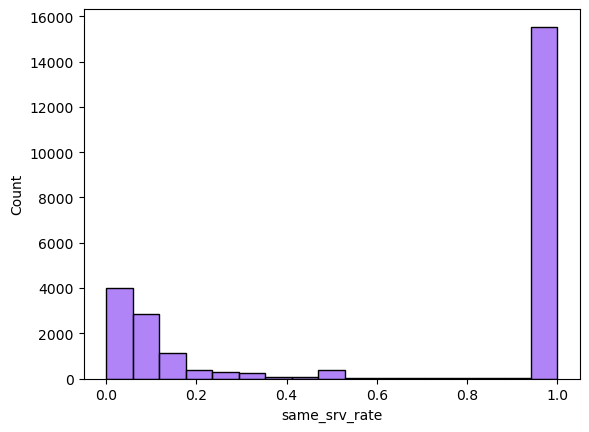

In [23]:
# same_srv_rate: The percentage of connections to the same service
sns.histplot(data=train, x='same_srv_rate')

- <strong>Box Plots</strong> <br><hr>
We usually use box plots to identify the presence of outliers in numerical features. Outliers may provide insights into potential anomalies or errors in the data.

<AxesSubplot: >

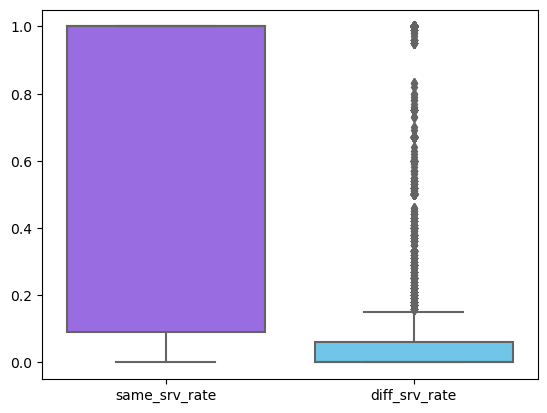

In [24]:
# diff_srv_rate: The percentage of connections to different services
# same_srv_rate: The percentage of connections to the same service
sns.boxplot(train_transformed[train_transformed.columns[28:30]])

<AxesSubplot: >

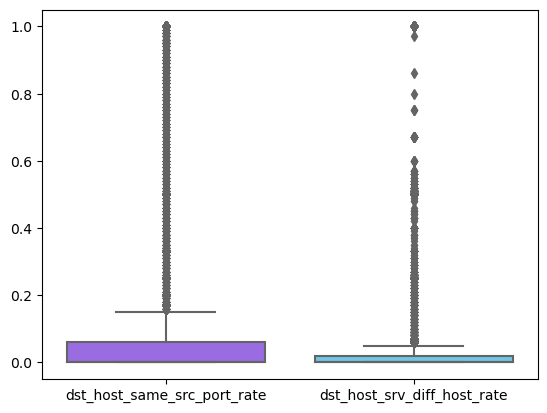

In [25]:
# The percentage of connections with the same source port to the same destination host
# dst_host_srv_diff_host_rate: The percentage of connections with different hosts to the same service on the destination host.
sns.boxplot(train[train.select_dtypes(['float' , 'int']).columns[30:32]])

- <strong>Kernel Density Plots</strong> <br><hr>
Kernel density plots can provide a smooth estimate of the probability density function for numerical features, giving us  a more nuanced view of the distribution.

<AxesSubplot: xlabel='count', ylabel='Density'>

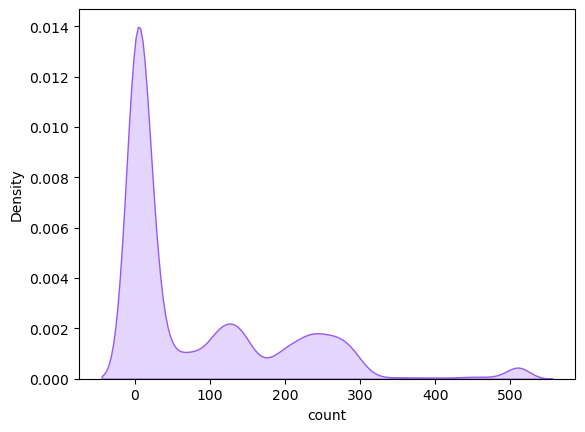

In [26]:
#count : The number of connections to the same host as the current connection in the past two seconds.
sns.kdeplot(data=train,x='count', fill=True) 

<AxesSubplot: xlabel='diff_srv_rate', ylabel='Density'>

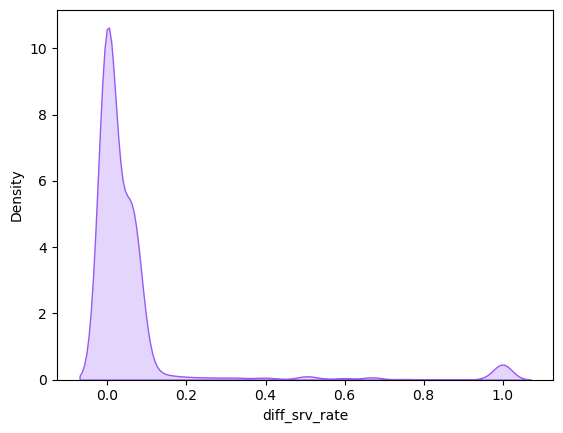

In [27]:
# diff_srv_rate: The percentage of connections to different services.
sns.kdeplot(data=train, x='diff_srv_rate', fill=True)

<h4>b. Categorical Features</h4>

- <strong>Bar Charts or Count Plots</strong> <br><hr>
For categorical features like protocol_type, service, flag, etc., we create bar charts or count plots to visualize the frequency of each category. This helps us understand the distribution of categorical variables.

<AxesSubplot: xlabel='class', ylabel='count'>

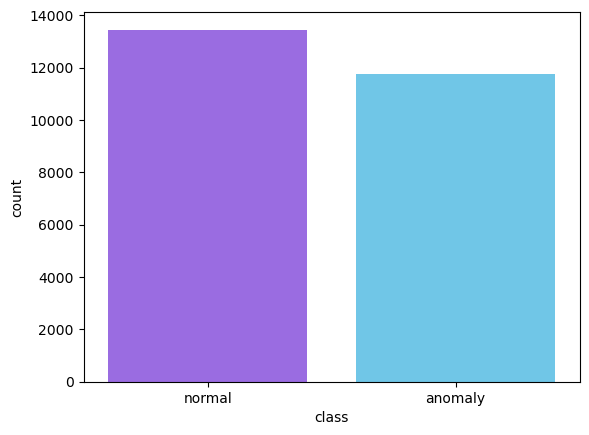

In [28]:
'''Class Distribution:
Create a bar chart or count plot for the target variable class to visualize the distribution of 'Normal' and 'Anomalous' instances. This is crucial for understanding the balance in our dataset.'''
sns.countplot(data=train , x='class')

<AxesSubplot: xlabel='protocol_type', ylabel='count'>

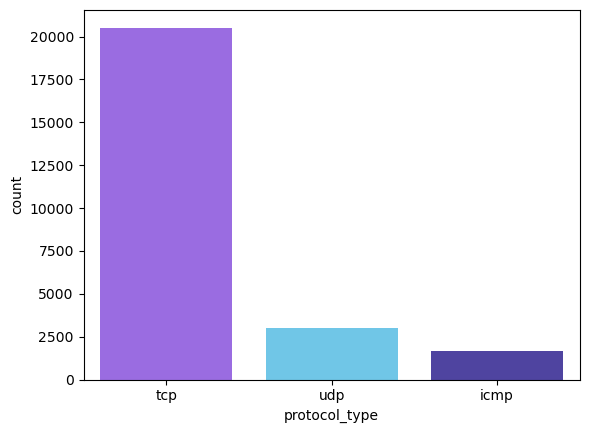

In [29]:
sns.countplot(data=train , x='protocol_type')

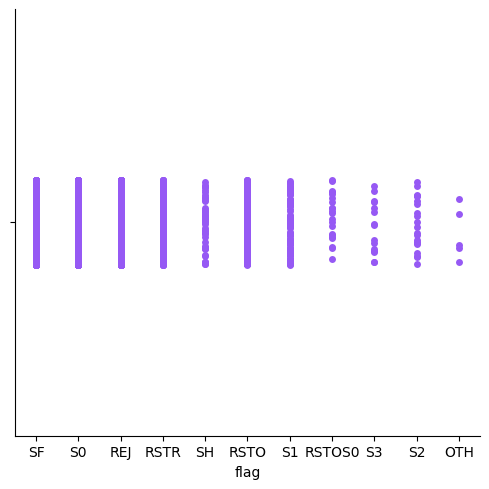

In [30]:
sns.catplot(data=train, x='flag')

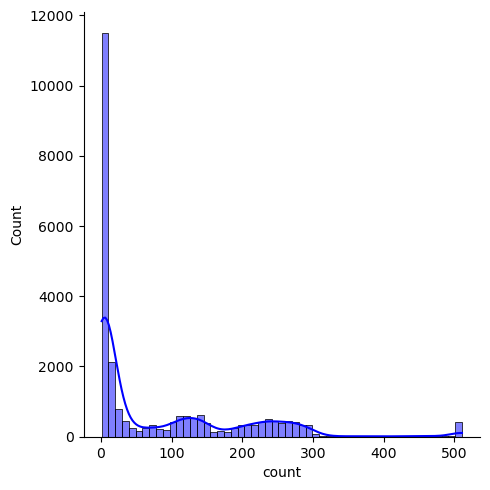

In [31]:
sns.displot(train['count'], kde=True, color='b')

<h3>2. Bivariate Visualization</h3>

- <strong>Scatter Plots</strong> <br><hr>
To visualize the relationship between two numerical variables.

<AxesSubplot: xlabel='num_root', ylabel='num_compromised'>

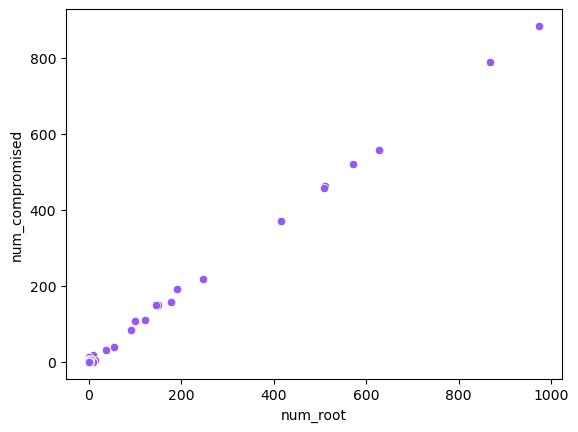

In [32]:
# num_compromised: The number of compromised conditions.
# num_root: The number of root accesses.
sns.scatterplot(data=train, x='num_root' , y='num_compromised')

- <strong>Regplot</strong> <br><hr>
It's a scatter plot with a linear regression line fitted to the data. It can be used to visualize the relationship between two numerical variables and assess the strength and direction of the linear relationship.

<AxesSubplot: xlabel='num_root', ylabel='num_compromised'>

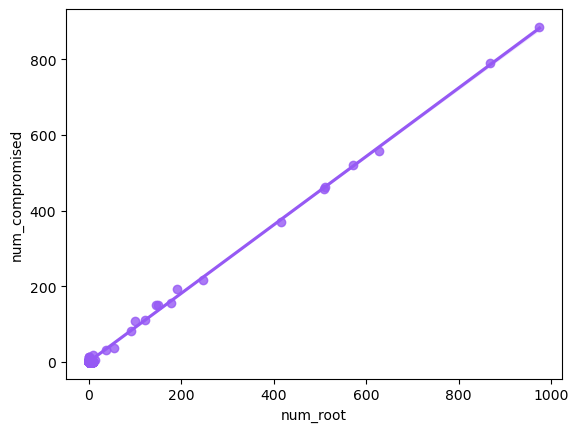

In [33]:
# num_compromised: The number of compromised conditions.
# num_root: The number of root accesses.
sns.regplot(data=train , x='num_root' , y='num_compromised')

<AxesSubplot: xlabel='srv_serror_rate', ylabel='srv_diff_host_rate'>

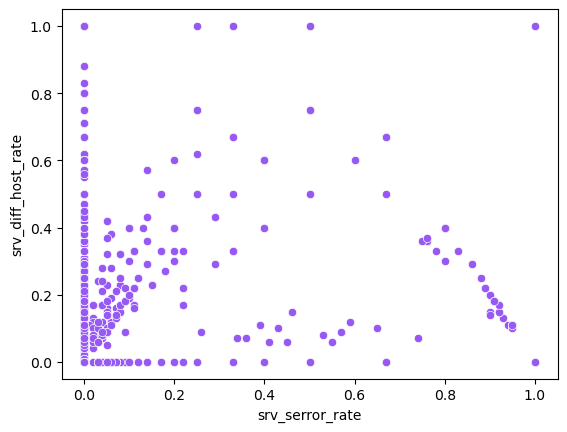

In [34]:
# srv_serror_rate: The percentage of connections to the same service with "SYN" errors.
# srv_diff_host_rate: The percentage of connections to different hosts among the same service.
sns.scatterplot(data=train, x='srv_serror_rate' , y='srv_diff_host_rate')

- <strong>Box Plots</strong> <br><hr>
To compare the distribution of a numerical variable across another category.

<AxesSubplot: xlabel='protocol_type', ylabel='count'>

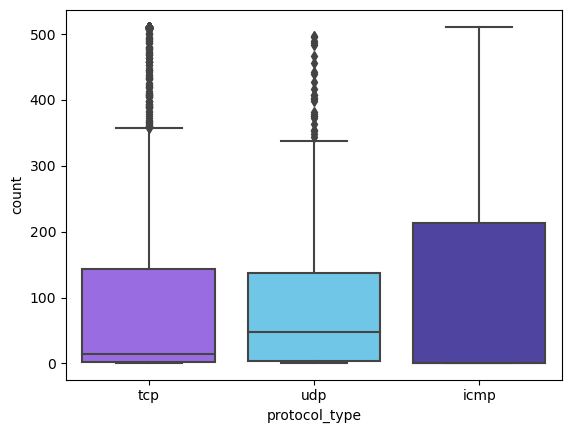

In [35]:
# protocol_type: The type of network protocol used for the connection (e.g., TCP, UDP, ICMP).
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.boxplot(data=train, x='protocol_type' , y='count')

<AxesSubplot: xlabel='flag', ylabel='count'>

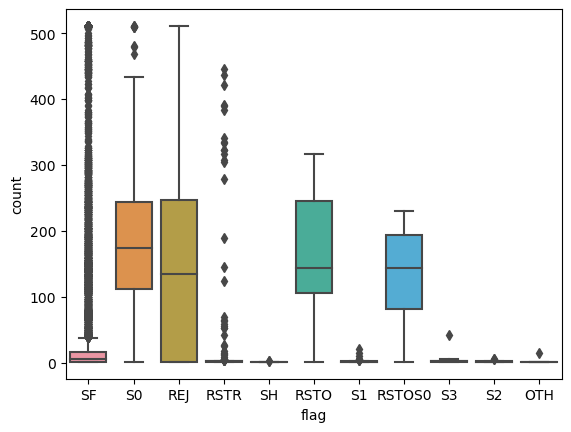

In [36]:
# flag: A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.boxplot(data=train, x='flag' , y='count')

- <strong>Violin Plots</strong> <br><hr>
Similar to box plots but provides a kernel density estimate of the underlying distribution.

<AxesSubplot: xlabel='flag', ylabel='logged_in'>

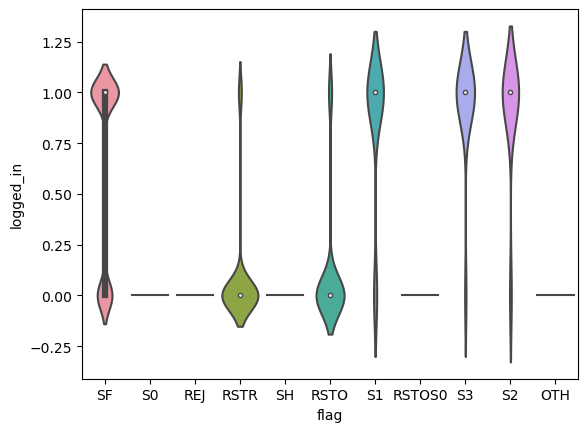

In [37]:
# flag: A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").
# logged_in: Indicates if the user is logged in (binary, 1 for yes, 0 for no).
sns.violinplot(data=train, x='flag' , y='logged_in')

- <strong>Categorical Plots</strong> <br><hr>
To visualize the relationship between a numerical and a categorical variable.

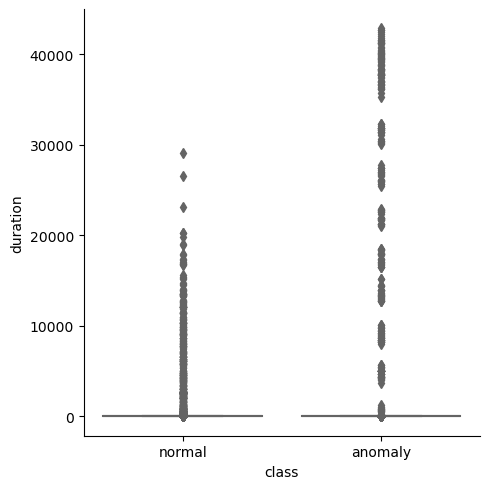

In [38]:
sns.catplot(x='class', y='duration', kind='box', data=train)

<h3>3. Multivariate Visualization</h3>
Multivariate visualization involves the simultaneous visualization of relationships between three or more variables. These visualizations are crucial for gaining insights into complex interactions and dependencies among multiple features in a dataset. Here are some common multivariate visualizations:

- <strong>Pair Plots with Hue</strong> <br><hr>
Visualizing relationships between multiple numerical variables, with the additional dimension of color representing a categorical variable.

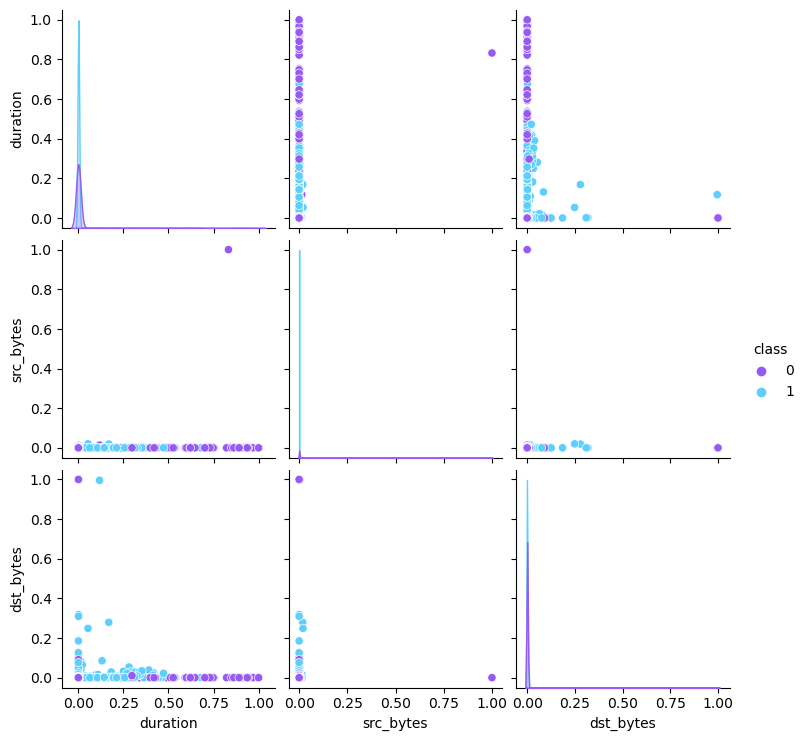

In [39]:
# duration:  The length (in seconds) of the connection. It measures the time duration for which the connection was active.
# src_bytes: The number of data bytes from the source to the destination during the connection.
# dst_bytes: The number of data bytes from the destination to the source during the connection.
sns.pairplot(train_transformed[['duration', 'src_bytes', 'dst_bytes', 'class']], hue='class')

- <strong>lmplot</strong> <br><hr>
Create scatter plots with regression lines, and it also provides the ability to include a third variable for color or markers. It is particularly useful for visualizing relationships between variables across different categories.

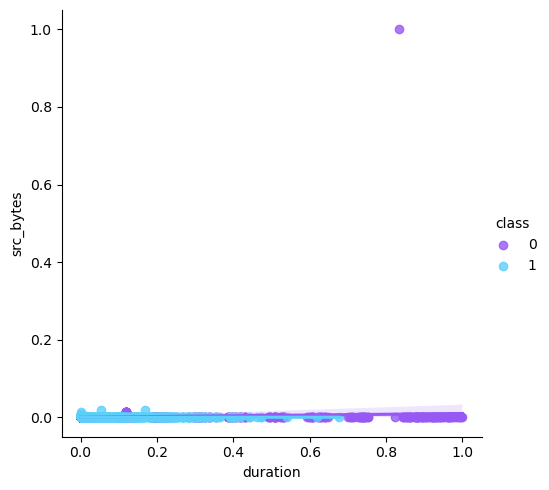

In [40]:
sns.lmplot(data=train_transformed, x='duration', y='src_bytes', hue='class')

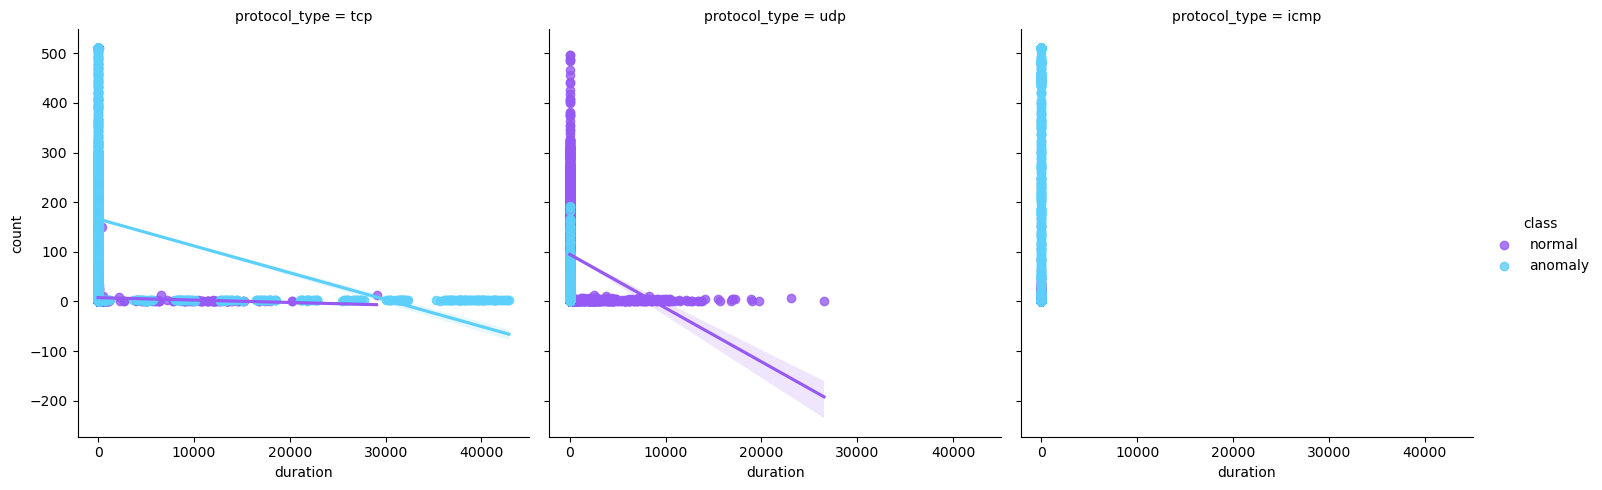

In [41]:
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.lmplot(data=train, x='duration', y='count', hue='class', col = 'protocol_type')

- <strong>Heatmaps</strong> <br><hr>
To visualize the correlation between multiple numerical variables.

<AxesSubplot: >

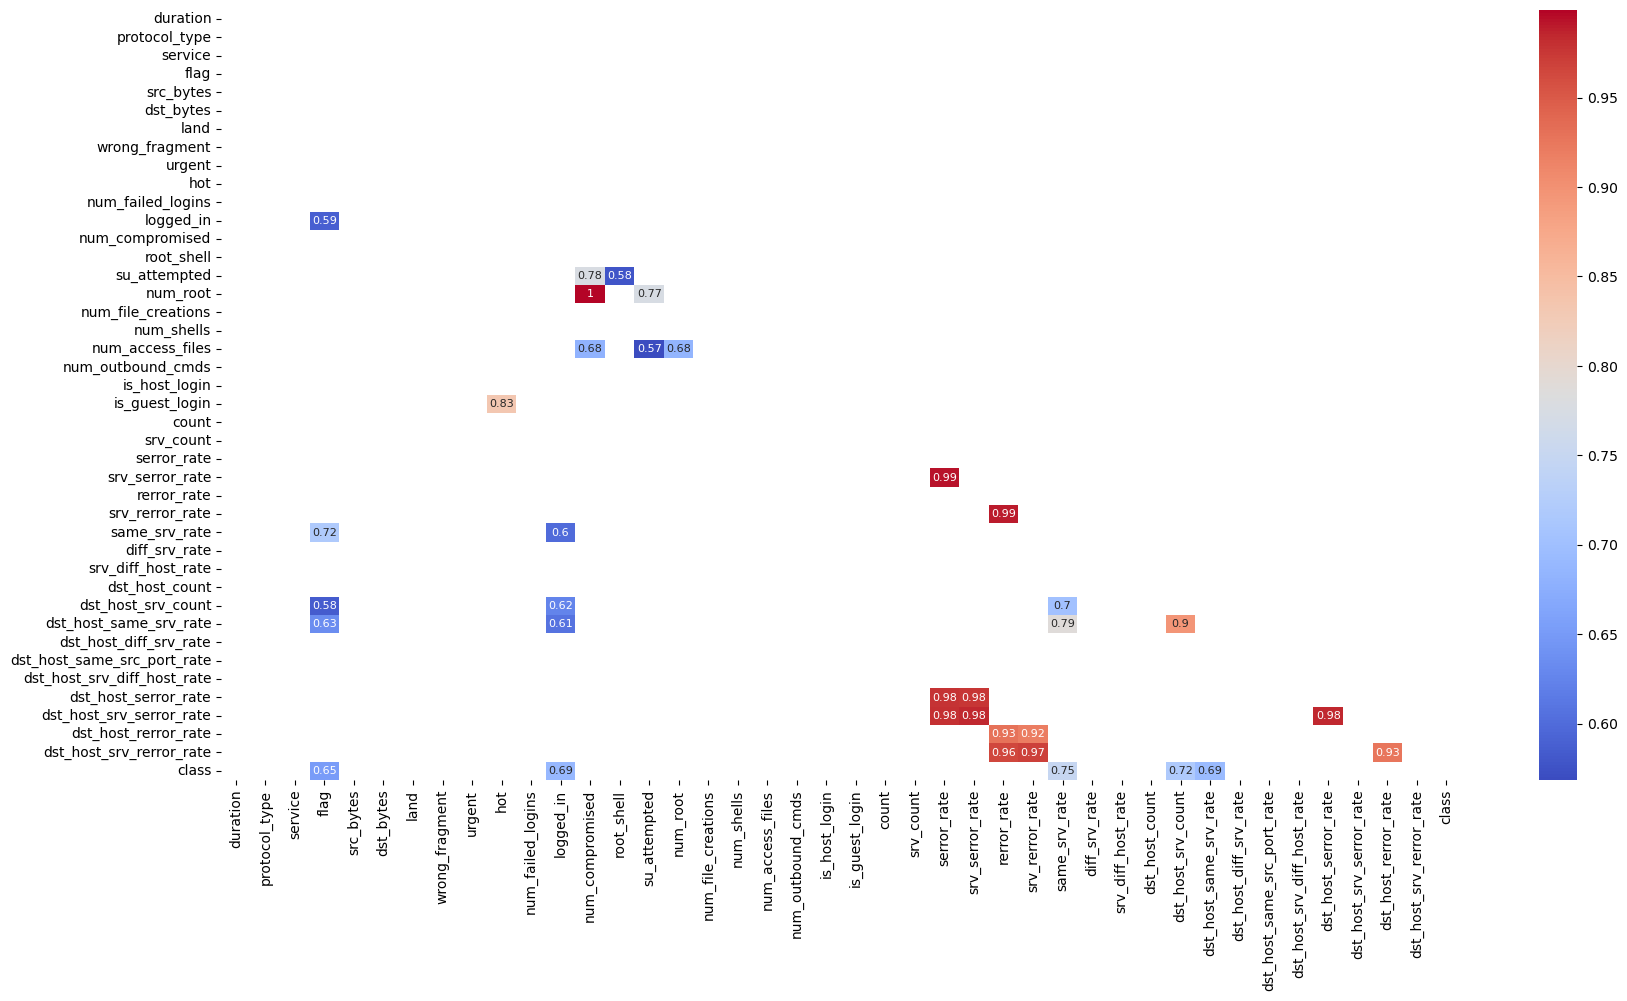

In [42]:
import numpy as np
corr_matrix = train_transformed.corr()

# Select columns with a correlation coefficient above a certain threshold
corr = corr_matrix[corr_matrix > 0.5]

# "mask" is used to show only the upper or the lower part of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Create a heatmap of the correlated columns
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot=True, annot_kws={'size':8}, cmap='coolwarm', mask=mask)

<h2>IV. Hypothesis Testing</h2>
Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data. It involves formulating a hypothesis, collecting data, and using statistical tests to determine whether there is enough evidence to reject the null hypothesis in favor of an alternative hypothesis. Here are the basic steps involved in hypothesis testing to answer some questions, we will try to make a hypothesis for every Hypothesis Test: T-Test, Chi-Square Test, ANOVA (Analysis of Variance), Regression Analysis..

![Tests](process.PNG)

<h3>1. Sampling</h3>

Sampling is critical because it allows researchers to make inferences about a larger population without having to study every individual in that population. The goal is to draw valid and reliable conclusions about the population based on a representative subset of data.



- <strong>Random Sampling</strong> <br><hr>

- Explanation: In random sampling, each individual in the population has an equal chance of being selected. This method is based on the principle of randomness, ensuring that every member of the population has an equal opportunity to be included in the sample.

- Use Case: Ideal for situations where the population is homogeneous, and every individual is equally likely to represent the entire population.

In [43]:
rand_sample = train.sample(frac=0.2)
rand_sample.shape

(5038, 40)

- <strong>Stratified Sampling</strong> <br><hr>

- Explanation: In stratified sampling, the population is divided into subgroups or strata based on certain characteristics. Random samples are then taken from each stratum. This ensures that each subgroup is represented in the final sample.

- Use Case: Useful when the population is heterogeneous, and there are distinct subgroups that need to be considered separately.

In [44]:
# Proportion of connections by protocol types
cnx_counts_pop = train['protocol_type'].value_counts(normalize=True)

# Print protocol_type_counts_pop
print(cnx_counts_pop) 

# Proportional stratified sampling for 40% of each protocol_type group
cnx_strat = train.groupby('protocol_type').sample(frac=0.4, random_state=2022)


# Print the sample
print(cnx_strat.shape)

tcp     0.814782
udp     0.119522
icmp    0.065695
Name: protocol_type, dtype: float64
(10076, 40)


In [45]:
# Proportion of connections by protocol types
cnx_eq = train.groupby('protocol_type')\
	.sample(n=1000, random_state=2022)      

# Get the proportions from cnx_eq
cnx_counts_eq = cnx_eq['protocol_type'].value_counts(normalize=True)

# Print the results
print(cnx_counts_eq)

icmp    0.333333
tcp     0.333333
udp     0.333333
Name: protocol_type, dtype: float64


- <strong>Cluster Sampling</strong> <br><hr>

- Explanation: Cluster sampling involves dividing the population into clusters, randomly selecting some clusters, and then sampling all individuals within those selected clusters.

- Use Case: Effective when the population is naturally grouped into clusters, and it is logistically easier to sample entire clusters.

In [48]:
import random
# Create a list of unique protocol_type values
protocol_type_pop = list(train['protocol_type'].unique())

# Randomly sample four protocol_type values
protocol_type_samp = random.sample(protocol_type_pop, k=3)

# Filter for rows where protocol_type is in protocol_type_samp
protocol_type_condition = train['protocol_type'].isin(protocol_type_samp)
cnx_filtered = train[protocol_type_condition]

# Randomly sample
cnx_clust = cnx_filtered.groupby('protocol_type').sample(n=1000, random_state=2022)


# Print the sample
print(cnx_clust['protocol_type'].value_counts() ,'\n', cnx_clust.shape)

icmp    1000
tcp     1000
udp     1000
Name: protocol_type, dtype: int64 
 (3000, 40)


- <strong>Systematic Sampling</strong> <br><hr>

- Explanation: Systematic sampling involves selecting every kth element from a list after randomly selecting a starting point. The value of k is determined by dividing the population size by the desired sample size.

- Use Case: Suitable when the population is ordered in some way, and a systematic pattern can be applied to select samples.

In [49]:
# Set the sample size to 1000
sample_size = 1000

# Calculate the population size from train
pop_size = len(train)

# Calculate the interval 
interval = pop_size // sample_size

# Systematically sample 1000 rows
attrition_sys_samp = train[::interval]

# Print the sample
print(attrition_sys_samp['protocol_type'].value_counts() ,'\n', attrition_sys_samp.shape)

tcp     803
udp     135
icmp     70
Name: protocol_type, dtype: int64 
 (1008, 40)


![Tests](imag.png)

<h3>2. Categorical Data </h3>

- <strong>Chi-Square Test</strong> <br><hr>
- Purpose: Used to test independence between two categorical variables or goodness of fit for one categorical variable against an expected distribution.

- <i>Hypotheses:</i>

  Null Hypothesis (H₀): there is no association between the "protocol_type" and "service" columns

  Alternative Hypothesis (H₁): there is an association of any kind between "protocol_type" and "service" columns
- <i>Specify the Significance Level (α):</i> α = 0.005

In [47]:
crosstab = pd.crosstab(train['protocol_type'], train['service'])
print(crosstab)

service        IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  domain  domain_u  echo  eco_i  ecr_i  efs  exec  finger  ftp  ftp_data  gopher  hostnames  http  http_443  http_8001  imap4  iso_tsap  klogin  kshell  ldap  link  login  mtp  name  netbios_dgm  netbios_ns  netbios_ssn  netstat  nnsp  nntp  ntp_u  other  pm_dump  pop_2  pop_3  printer  private  red_i  remote_job  rje  shell  smtp  sql_net  ssh  sunrpc  supdup  systat  telnet  tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  whois
protocol_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [48]:
print(stats.chi2_contingency(crosstab)[:3])

(43084.681782297295, 0.0, 130)


In [49]:
print(list(stats.chi2_contingency(crosstab)[3:]))

[array([[2.62781836e+00, 1.44530010e+00, 1.12996189e+01, 1.24164417e+01,
        9.59153700e+00, 1.07740553e+01, 7.29219594e+00, 8.34332328e+00,
        7.02941410e+00, 6.89802318e+00, 7.16080502e+00, 1.19565735e+02,
        4.27020483e+00, 5.97171721e+01, 4.02713163e+01, 7.22650048e+00,
        5.97828676e+00, 2.40445379e+01, 2.26649333e+01, 9.17108606e+01,
        7.16080502e+00, 6.30676405e+00, 5.25760757e+02, 7.42358685e+00,
        6.56954589e-02, 9.06597332e+00, 8.60610511e+00, 6.04398222e+00,
        4.40159574e+00, 5.91259130e+00, 5.58411400e+00, 5.18994125e+00,
        5.91259130e+00, 6.04398222e+00, 5.58411400e+00, 4.99285487e+00,
        4.40159574e+00, 5.12424579e+00, 8.08054144e+00, 4.00742299e+00,
        2.10225468e+00, 5.63667037e+01, 1.97086377e-01, 1.11682280e+00,
        3.48185932e+00, 7.88345507e-01, 2.85840942e+02, 1.97086377e-01,
        1.11682280e+00, 1.31390918e+00, 7.22650048e-01, 9.51927199e+01,
        3.02199111e+00, 3.81033661e+00, 4.40159574e+00, 7.48928

The first value (43084.681782297295) is the Chi-square value, followed by the p-value (0.0), then comes the degrees of freedom (130), and lastly it outputs the expected frequencies as an array. 

Since all of the expected frequencies are less than 5, the chi2 test results can not be trusted. 

We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Service and Protocol_type.

- <strong>Fisher's Exact Test</strong> <br><hr>
- Purpose: Similar to the chi-square test but used when sample sizes are small.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): The two variables are independent

  Alternative Hypothesis (H₁): The two variables are not independent
- <i>Specify the Significance Level (α):</i> α = 0.005

In [50]:
crosstab[:2][["urp_i","uucp"]]

service        urp_i  uucp
protocol_type             
icmp             124     0
tcp                0   157

In [51]:
stats.fisher_exact(crosstab[:2][["urp_i","uucp"]], alternative='two-sided')

SignificanceResult(statistic=inf, pvalue=3.7484310323745785e-83)

p-value : The probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. <br>
p-value = 3.74 * 10^-83 < α -> We reject H0

<h3>3. Numerical Data </h3>


- <strong>T-Test </strong> <br><hr>
- Purpose: Used to compare the means of two groups.

- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference between the means of the two independent groups.

  Alternative Hypothesis (H₁): There is a significant difference between the means of the two independent groups.
- <i>Specify the Significance Level (α):</i> α = 0.005

In [52]:
stats.ttest_ind(train['duration'], train['num_failed_logins'], axis=0, equal_var=True, \
                nan_policy='propagate', permutations=None, \
                    random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=18.022318547883692, pvalue=2.1993104060449052e-72)

p-value = 2.19 *10^-72 < α -> We reject H0

- <strong>ANOVA (Analysis of Variance)</strong> <br><hr>
- Purpose: Used to compare means of more than two groups.
- Testing if there is a significant difference in the mean of column across multiple categories.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'protocol_type' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the mean 'duration' across at least one 'protocol_type.'
- <i>Specify the Significance Level (α):</i> α = 0.005

In [53]:
anova_result = pg.anova(data=train, dv='duration', between='protocol_type')

# Print the ANOVA summary
print(anova_result)

          Source  ddof1  ddof2          F         p-unc       np2
0  protocol_type      2  25189  17.598277  2.304093e-08  0.001395


Based on the small p-value, we would reject the null hypothesis and conclude that there is a statistically significant difference in the mean 'duration' across different 'protocol_type' groups.

- <strong>Kruskal-Wallis Test</strong> <br><hr>
- Purpose: Non-parametric alternative to ANOVA when assumptions are not met.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'protocol_type' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the distribution of 'duration' across at least one 'protocol_type.'
  
- <i>Specify the Significance Level (α):</i> α = 0.005

In [54]:
kw_test = pg.kruskal(data=train, dv='duration', between='protocol_type')

# Print the Kruskal summary
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  protocol_type      2  297.976062  1.973878e-65


The p-value associated with the Kruskal-Wallis test is 1.973878e-65. So we would reject the null hypothesis. Therefore, we conclude that there are significant differences in the distribution of 'duration' across different 'protocol_type' groups.

- <strong>Mann-Whitney U Test</strong> <br><hr>
- Purpose: Non-parametric alternative to the t-test for comparing two independent groups.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'class' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the distribution of 'duration' across at least one 'class.'
  
- <i>Specify the Significance Level (α):</i> α = 0.005

In [55]:
'''We can't use this test on our dataset but we left it commented
wilcsr = stats.wilcoxon(podataframe.votes2018,podataframe.votes2023)
print(wilcsr)'''

"We can't use this test on our dataset but we left it commented\nwilcsr = stats.wilcoxon(podataframe.votes2018,podataframe.votes2023)\nprint(wilcsr)"

# Supervised Learning

In [56]:
train_X = train_transformed.drop(['class'], axis=1)
train_Y = train['class'] #class
train_X.shape

(25192, 41)

In [57]:
test_transformed.shape

(22544, 41)

## Feature Selection

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(train_X, train_Y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances[:5])

                        importance
feature                           
dst_bytes                    0.114
flag                         0.106
diff_srv_rate                0.085
same_srv_rate                0.075
dst_host_same_srv_rate       0.070


<AxesSubplot: xlabel='feature'>

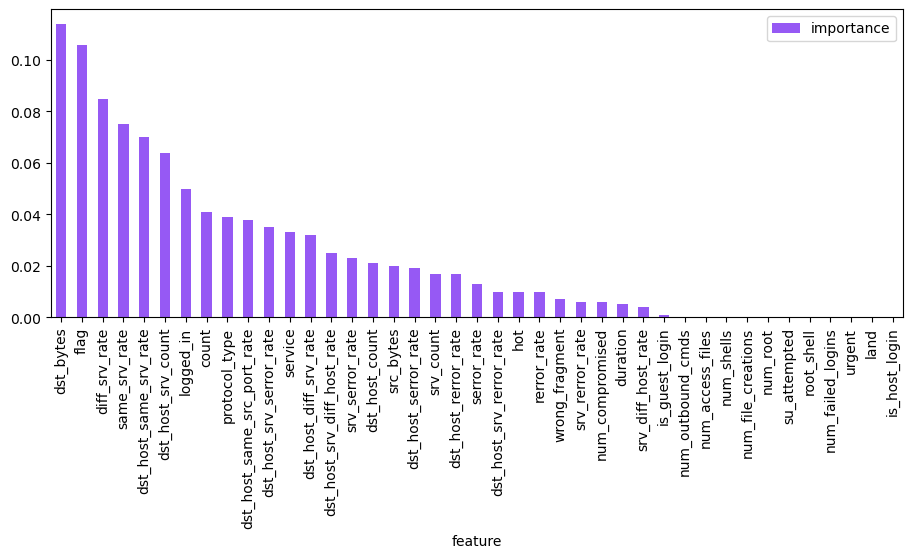

In [59]:
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

Feature ranking with recursive feature elimination. Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [60]:
from sklearn.feature_selection import RFE
import itertools

# create the RFE model and select 3 attributes
rfe = RFE(rfc, n_features_to_select=3)
rfe = rfe.fit(train_X, train_Y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)] #Get a mask, or integer index, of the features selected : returns a list of selected features
selected_features = [v for i, v in feature_map if i==True]

selected_features

['flag', 'dst_bytes', 'same_srv_rate']

We decided that the best features to keep were the top 3 in our visualisation

## Dataset Partition

In [52]:
from sklearn.model_selection import train_test_split
train_X = train_transformed.drop(['class'], axis=1)
train_Y = train['class'] #class
train_X.shape
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_Y,train_size=0.70, random_state=2)  

## Fitting Models

In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Train Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100)
RF_Classifier.fit(X_train,Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1 , p=2) #Using Euclidean Distance and all processors
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0) #Using all processors
LGR_Classifier.fit(X_train, Y_train)

# Train Bernouilli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
criterion='entropy',
max_depth=4, max_features=None, #We chose max_depth= 4 to get a good visualisation 
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0,
random_state=0, splitter='best')

DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

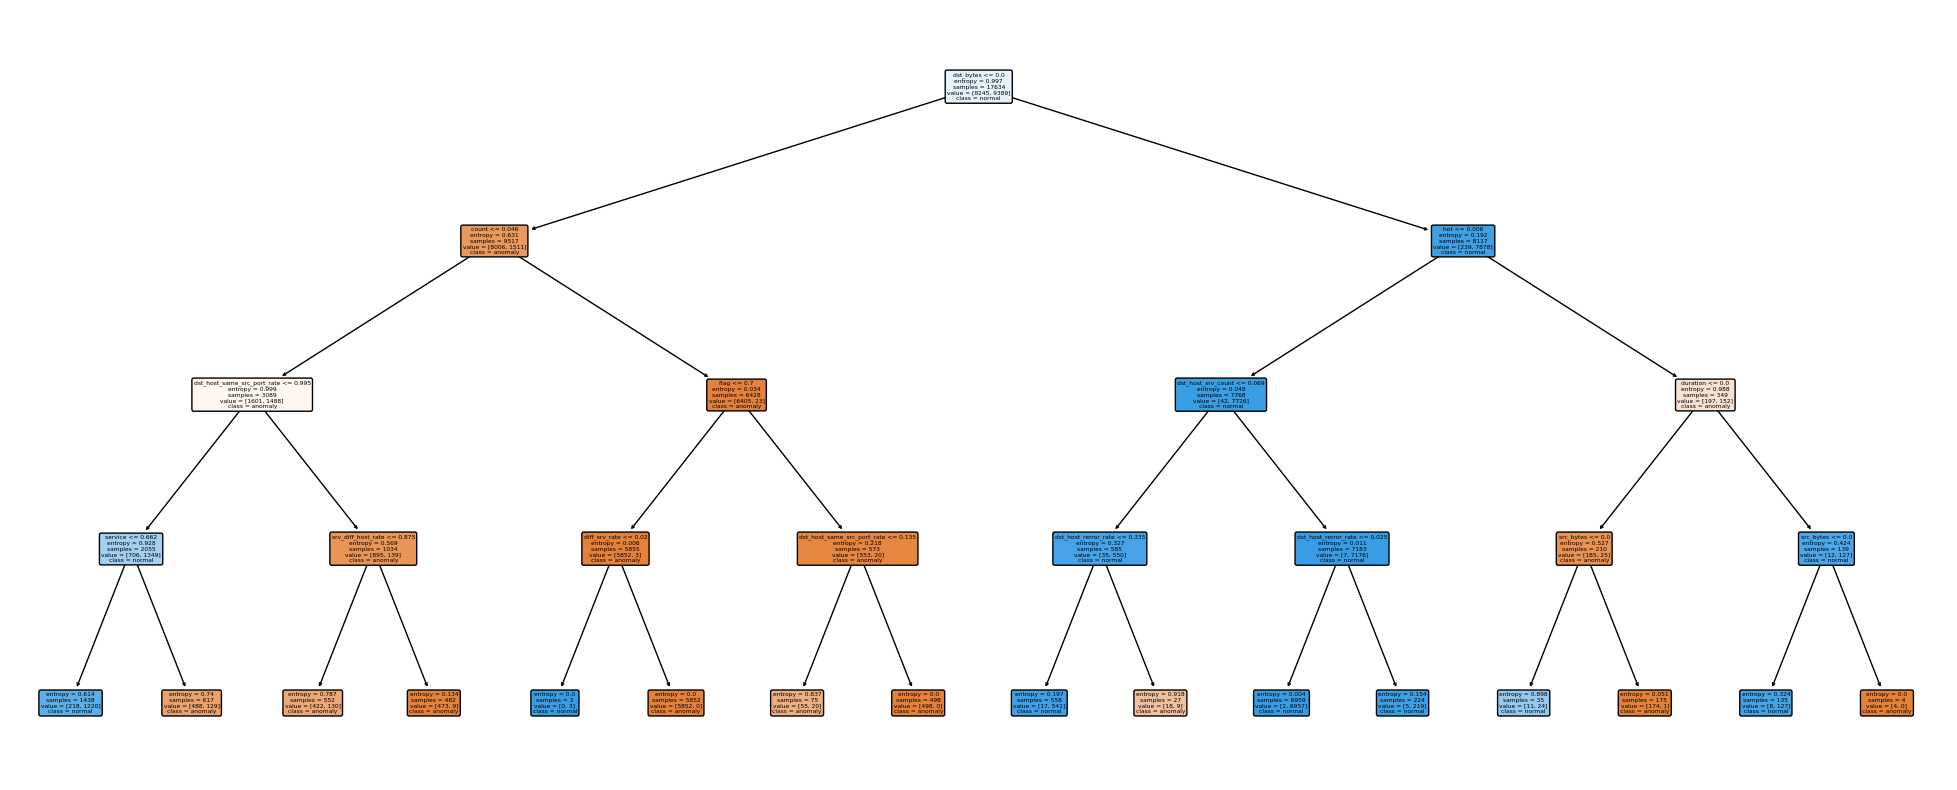

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming dtc is your trained DecisionTreeClassifier
plt.figure(figsize=(25, 10))
plot_tree(DTC_Classifier, filled=True, feature_names=X_train.columns, class_names=Y_train.unique(), rounded=True)
plt.show()

## Evaluate Models

In [65]:
from sklearn import metrics

# Evaluating the models basing on the trainning data
models = []
models.append(('Random Forest Classifier', RF_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

In [66]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print (f"{i} Accuracy:" , accuracy)
    #The next lines were commented to give a good output. It could be uncommented and executed but the output will be limited
"""print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()
"""

Random Forest Classifier Accuracy: 1.0
Naive Baye Classifier Accuracy: 0.8950323239197006
Decision Tree Classifier Accuracy: 0.9682998752410117
KNeighborsClassifier Accuracy: 0.9926845865940797
LogisticRegression Accuracy: 0.9541227174776001


'print()\n    print(\'============================== {} Model Evaluation ==============================\'.format(i))\n    print()\n    print ("Cross Validation Mean Score:" "\n", scores.mean())\n    print()\n    print()\n    print("Confusion matrix:" "\n", confusion_matrix)\n    print()\n    print("Classification report:" "\n", classification)\n    print()\n'

In [67]:
# PREDICTING FOR TEST DATA
pred_rf = RF_Classifier.predict(test_transformed)
pred_knn = KNN_Classifier.predict(test_transformed)
pred_NB = BNB_Classifier.predict(test_transformed)
pred_log = LGR_Classifier.predict(test_transformed) 
pred_dt = DTC_Classifier.predict(test_transformed)

# Unsupervised Learning

## Clustering

### K-Means Clustering: Group data points into k clusters based on their feature similarities.

In [68]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train_X)
    wcss.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

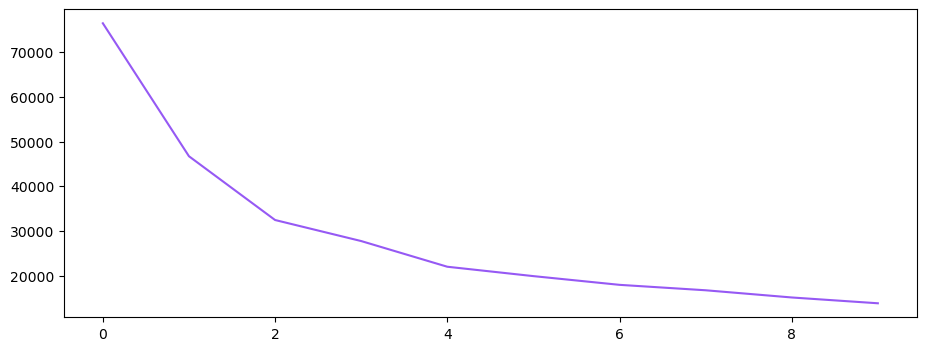

In [69]:
plt.plot(wcss)

According to the elbow method the best number of clusters is 4 therefore we decided to make 4 clusters. The code below should do it:

In [91]:
# Choose the number of clusters
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_X['cluster'] = kmeans.fit_predict(train_X)

In [94]:
train_X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'cluster', 'Cluster', 'is_outlier'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='count', ylabel='diff_srv_rate'>

Text(0.5, 1.0, 'K-Means Clustering')

Text(0.5, 0, 'count')

Text(0, 0.5, 'diff_srv_rate')

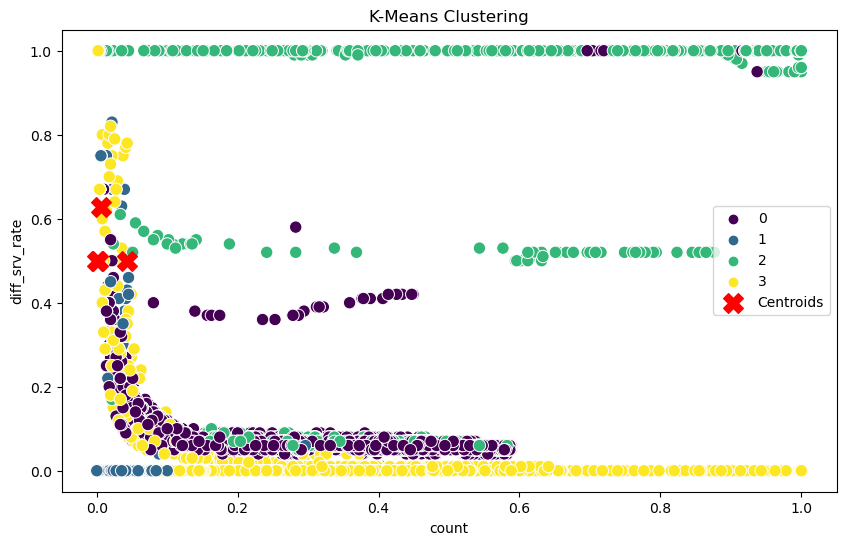

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='count', y='diff_srv_rate', hue='cluster', data=train_X, palette='viridis', legend='full', s=80)

# Visualize the clusters (considering two features for simplicity)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('count')
plt.ylabel('diff_srv_rate')
plt.legend()
plt.show()

### Hierarchical Clustering: Build a hierarchy of clusters using a bottom-up or top-down approach.

<AxesSubplot: xlabel='srv_diff_host_rate', ylabel='srv_serror_rate'>

Text(0.5, 1.0, 'Agglomerative Hierachical Clustering')

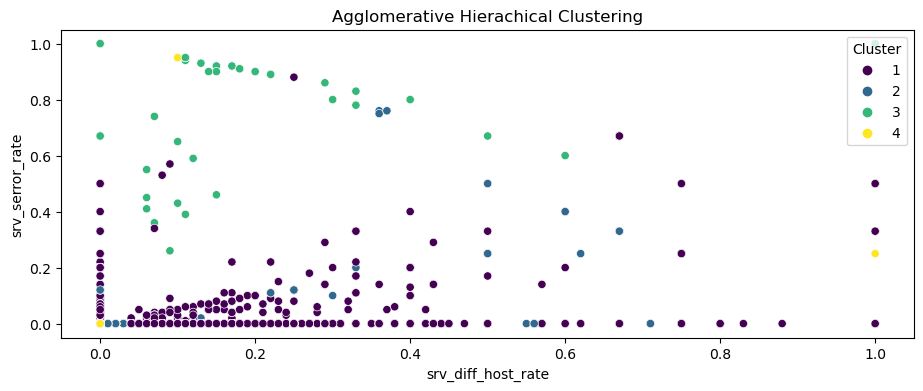

In [72]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Assuming train_X is your DataFrame
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(train_X)

# Add the cluster labels to your DataFrame
train_X['Cluster'] = labels+1

# Plot the clusters using a scatter plot
sns.scatterplot(x='srv_diff_host_rate', y='srv_serror_rate', hue='Cluster', data=train_X, palette='viridis')
plt.title('Agglomerative Hierachical Clustering')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [40.0, 40.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [47.5, 47.5, 70.0, 70.0],
  [17.5, 17.5, 58.75, 58.75],
  [85.0, 85.0, 95.0, 95.0],
  [90.0, 90.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [97.5, 97.5, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [180.0, 180.0, 195.0, 195.0],
  [150.0, 150.0, 187.5, 187.5],
  [205.0, 205.0, 215.0, 215.0],
  [210.0, 210.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [240.0, 240.0, 255.0, 255.0],
  [217.5, 217.5, 247.5, 247.5],
  [168.75, 168.75, 232.5, 232.5],
  [108.75, 108.75, 200.625, 200.625],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [290.0, 290.0, 305.0, 305.0],
  [270.0, 270.0, 297.5, 297.5],
  [315.0, 315.0, 325.0, 325.0],
  [320.0, 320.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [327.5, 327.5, 350.0, 35

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Cluster Distance')

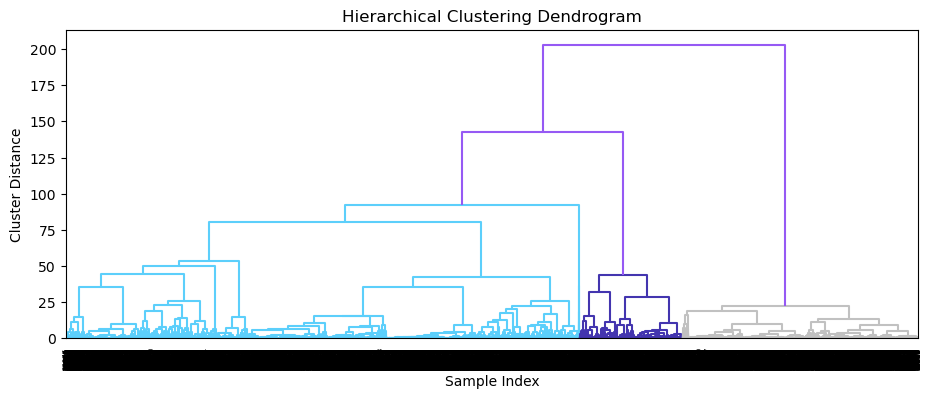

In [73]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(X_train, method='ward')  

# Create a dendrogram
dendrogram(linkage_matrix, labels=X_train.index, orientation='top', distance_sort='descending')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Identify clusters based on the density of data points.

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Choose a range of epsilon values 
epsilon_values = [0.1, 0.5, 1.0, 1.5, 2.0,3.0,4.0]

for eps in epsilon_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    clusters = dbscan.fit_predict(train_X)
    
    # Exclude noise points (-1) from silhouette score calculation
    if len(set(clusters)) > 1:  
        silhouette_avg = silhouette_score(train_X, clusters)
        print(f"EPS={eps}, Silhouette Score: {silhouette_avg}")
    else:
        print(f"EPS={eps}, No valid clusters.")


EPS=0.1, Silhouette Score: -0.06495669226387056
EPS=0.5, Silhouette Score: 0.3436734877036759
EPS=1.0, Silhouette Score: 0.3838177164237951
EPS=1.5, Silhouette Score: 0.4643846940137729
EPS=2.0, Silhouette Score: 0.5466639827379665
EPS=3.0, Silhouette Score: 0.8393681475914978
EPS=4.0, Silhouette Score: 0.8394690408894792


In [75]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Anomaly Detection

### Isolation Forest: Identify anomalies (outliers) in the data.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Isolation Forest - Anomaly Detection')

Text(0.5, 0, 'Data Point Index')

Text(0, 0.5, 'same_srv_rate')

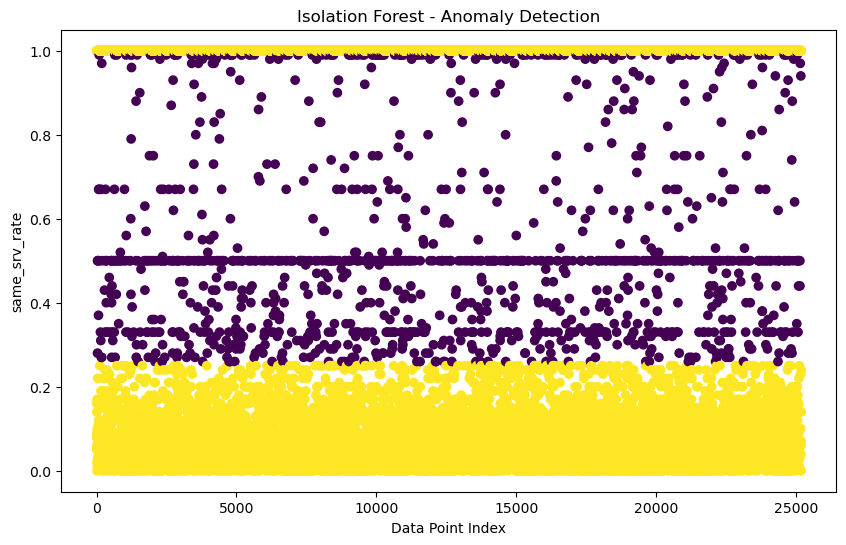

Detected outliers: [31, 33, 43, 58, 67, 72, 89, 92, 111, 136, 149, 168, 170, 178, 184, 205, 281, 298, 318, 324, 330, 345, 350, 383, 391, 453, 505, 509, 515, 522, 527, 533, 536, 537, 549, 560, 577, 593, 631, 632, 635, 653, 662, 686, 692, 695, 703, 722, 788, 796, 823, 841, 849, 909, 980, 995, 1047, 1048, 1050, 1059, 1118, 1172, 1206, 1207, 1221, 1227, 1234, 1247, 1262, 1267, 1269, 1322, 1406, 1410, 1416, 1425, 1447, 1466, 1486, 1542, 1555, 1587, 1646, 1698, 1724, 1726, 1731, 1768, 1788, 1807, 1821, 1822, 1849, 1885, 1890, 1927, 1944, 1974, 1978, 1980, 2011, 2026, 2061, 2067, 2088, 2099, 2109, 2173, 2203, 2253, 2262, 2291, 2296, 2303, 2305, 2312, 2342, 2356, 2358, 2383, 2384, 2433, 2436, 2455, 2486, 2581, 2610, 2667, 2706, 2709, 2716, 2719, 2727, 2734, 2736, 2746, 2784, 2793, 2806, 2826, 2868, 2874, 2884, 2888, 2903, 2913, 2916, 2945, 2970, 2975, 2978, 2989, 3016, 3073, 3084, 3098, 3114, 3152, 3215, 3221, 3253, 3284, 3304, 3311, 3342, 3350, 3354, 3386, 3400, 3446, 3463, 3471, 3477, 3480, 

In [76]:
from sklearn.ensemble import IsolationForest


feature_of_interest = 'same_srv_rate'

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05) 

# Fit the model on your data
isolation_forest.fit(train_X[[feature_of_interest]])

# Predict outliers
train_X['is_outlier'] = isolation_forest.predict(train_X[[feature_of_interest]])

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(train_X.index, train_X[feature_of_interest], c=train_X['is_outlier'], cmap='viridis')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Data Point Index')
plt.ylabel(feature_of_interest)
plt.show()

# Print the indices of the detected outliers
detected_outliers = train_X[train_X['is_outlier'] == -1]
print('Detected outliers:', detected_outliers.index.tolist())


## Dimensionality Reduction

###  Principal Component Analysis (PCA): Reduce the dimensionality of the data while preserving most of its variance.

In [77]:
from sklearn.decomposition import PCA


n_components = 2

# Apply PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(train_X)

# Create a DataFrame with the principal components
pc_train_X = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


<BarContainer object of 2 artists>

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 1.0, 'Explained Variance Ratio for each Principal Component')

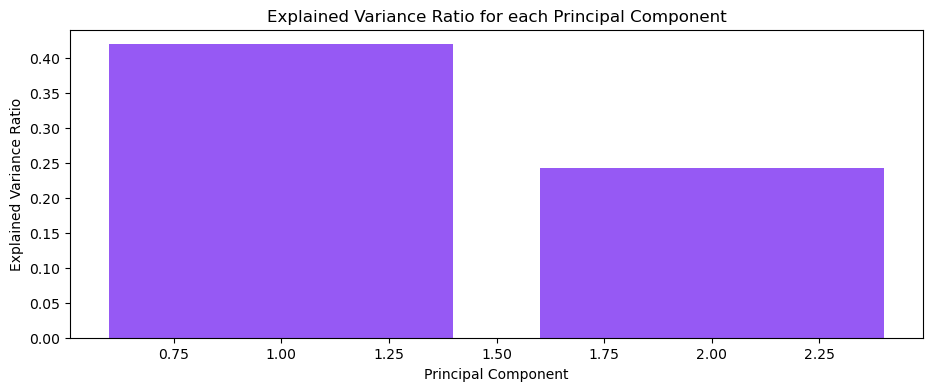

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, '2D Projection of Data in Principal Component Space')

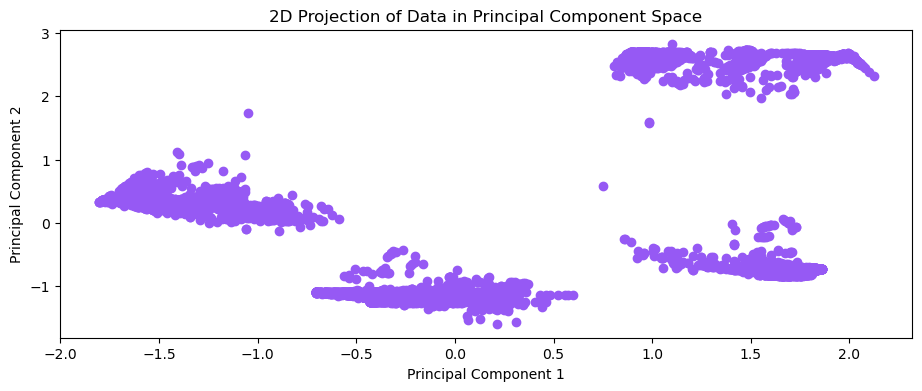

In [78]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

# Visualize the data in the reduced space (2D in this example)
plt.scatter(pc_train_X['PC1'], pc_train_X['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data in Principal Component Space')
plt.show()

Centroids:
        PC1       PC2       cluster
0  1.759650 -0.731196  8.881784e-15
1 -1.574164  0.343966  1.000000e+00
2  1.622617  2.612247  2.000000e+00
3 -0.299278 -1.138590  3.000000e+00


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering with Centroids')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

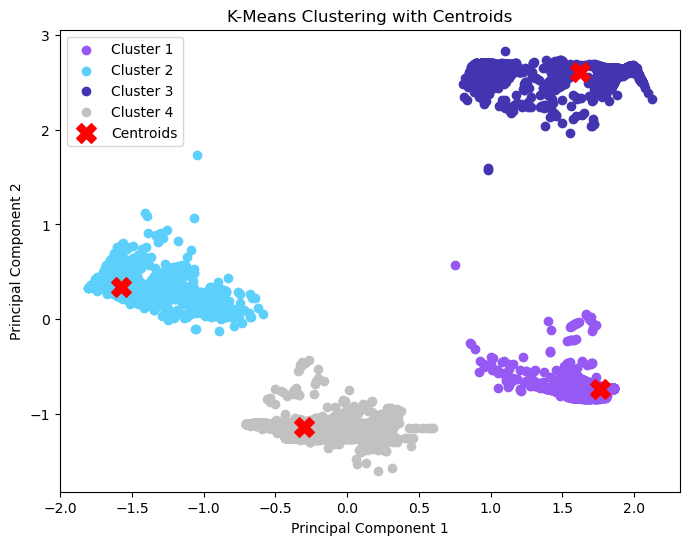

In [81]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
pc_train_X['cluster'] = kmeans.fit_predict(pc_train_X)

# Display the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pc_train_X.columns) 
print("Centroids:")
print(centroids)

# Visualize the data and centroids
plt.figure(figsize=(8, 6))

# Plot data points with color-coded clusters
for cluster in range(k):
    cluster_data = pc_train_X[pc_train_X['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')

# Plot centroids
plt.scatter(centroids['PC1'], centroids['PC2'], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

As the figure shows, upon choosing 2 principal components, we get 3 groups but we can try with k=4 and it gives a pretty good result as well as suggested by the elbow method

<BarContainer object of 3 artists>

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 1.0, 'Explained Variance Ratio for each Principal Component')

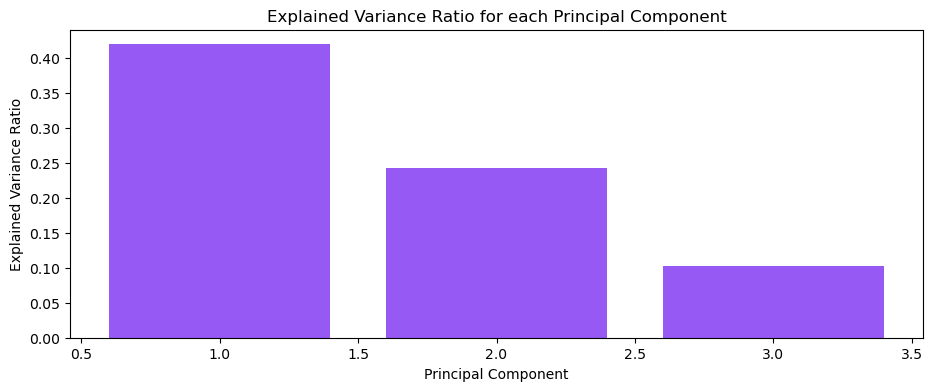

In [82]:
n_components = 3
import plotly.express as px

# Standardize the data (important for PCA)

# Apply PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(train_X)

# Create a DataFrame with the principal components
pc_train_X = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

# Visualize the data in the reduced space (3D in this example)
from mpl_toolkits.mplot3d import Axes3D

fig = px.scatter_3d(pc_train_X, x='PC1', y='PC2', z='PC3', title='3D Projection of Data in Principal Component Space')
fig.show()

### t-Distributed Stochastic Neighbor Embedding (t-SNE): Visualize high-dimensional data in lower dimensions, often used for exploration and clustering.

In [53]:
from sklearn.manifold import TSNE

n_components = 3

# Apply t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(train_X)

# Create a DataFrame with the t-SNE results
tsne_train_X = pd.DataFrame(data=tsne_result, columns=[f'Dim{i+1}' for i in range(n_components)])




In [84]:
# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(tsne_train_X, x='Dim1', y='Dim2', z='Dim3', title='t-SNE Visualization (3D)')
fig.show()

# Deep Learning

In [85]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

lb=LabelEncoder()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.fit_transform(Y_test)
# Build a simple neural network for classification using TensorFlow and Keras
SequentialDL = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
SequentialDL.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
SequentialDL.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on the test set
loss, accuracy = SequentialDL.evaluate(X_test, Y_test)
print(f'Loss on Test Set: {loss}')
print(f'Accuracy on Test Set: {accuracy}')




Epoch 1/50


552/552 [==============================] - 2s 2ms/step - loss: 0.1871 - accuracy: 0.9399 - val_loss: 0.1210 - val_accuracy: 0.9594
Epoch 2/50
552/552 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9651 - val_loss: 0.1003 - val_accuracy: 0.9675
Epoch 3/50
552/552 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9698 - val_loss: 0.0898 - val_accuracy: 0.9700
Epoch 4/50
552/552 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9715 - val_loss: 0.0829 - val_accuracy: 0.9713
Epoch 5/50
552/552 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9731 - val_loss: 0.0818 - val_accuracy: 0.9734
Epoch 6/50
552/552 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9742 - val_loss: 0.0726 - val_accuracy: 0.9766
Epoch 7/50
552/552 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9747 - val_loss: 0.0675 - val_accuracy: 0.9759
E

237/237 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9902
Loss on Test Set: 0.03404060751199722
Accuracy on Test Set: 0.9902090430259705


In [86]:
y_pred_probabilities = SequentialDL.predict(test_transformed)

# Decode the predicted class (0: normal, 1: anomaly)
y_pred_binary = np.where(y_pred_probabilities > 0.5, 1, 0)

print(f'Predicted Class: {y_pred_binary}')

705/705 [==============================] - 1s 1ms/step
Predicted Class: [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [87]:
pd.Series(y_pred_binary.reshape(22544)).value_counts()

1    14804
0     7740
dtype: int64

In [88]:
models

[('Random Forest Classifier', RandomForestClassifier()),
 ('Naive Baye Classifier', BernoulliNB()),
 ('Decision Tree Classifier',
  DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)),
 ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
 ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0))]

# Models Comparison

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Import roc_auc_score
from sklearn.metrics import roc_auc_score
Y_train_ECD=lb.fit_transform(Y_train)
Y_test_ECD=lb.fit_transform(Y_test)
# Assuming models is a list of tuples containing model names and corresponding models
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train_ECD, cv=10 , scoring="accuracy")
    temp=v.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train_ECD, lb.fit_transform(temp))

    # Assuming your model has a predict_proba method
    y_probs = v.predict_proba(X_train)[:, 1]  # Use the positive class probabilities
    auc_score = roc_auc_score(Y_train_ECD, y_probs)

    print(f"Model: {i}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC Score: {auc_score}")
    print("Cross-Validation Scores:")
    print(scores)
    print("\n")

#We can not show the deep learning metrics as they don't have a get params attribute therefore we decided to show only sklearn models


Model: Random Forest Classifier
Accuracy: 1.0
AUC Score: 1.0
Cross-Validation Scores:
[0.99773243 0.99433107 0.99546485 0.99603175 0.99829836 0.99716393
 0.99489507 0.99546228 0.99546228 0.99489507]


Model: Naive Baye Classifier
Accuracy: 0.8950323239197006
AUC Score: 0.9616452319821766
Cross-Validation Scores:
[0.89455782 0.89512472 0.90249433 0.8962585  0.89619966 0.89052751
 0.90640953 0.88655701 0.88996029 0.88769144]


Model: Decision Tree Classifier
Accuracy: 0.9682998752410117
AUC Score: 0.9945541668084938
Cross-Validation Scores:
[0.97165533 0.96938776 0.96258503 0.95918367 0.96823596 0.97163925
 0.96880318 0.97277368 0.95745888 0.97277368]


Model: KNeighborsClassifier
Accuracy: 0.9926845865940797
AUC Score: 0.999852051944455
Cross-Validation Scores:
[0.98979592 0.98526077 0.98696145 0.98866213 0.99205899 0.99035735
 0.98979013 0.99035735 0.98979013 0.98638684]


Model: LogisticRegression
Accuracy: 0.9541227174776001
AUC Score: 0.9906140632293535
Cross-Validation Scores:
[0.9

<Figure size 1100x400 with 0 Axes>

Model: Random Forest Classifier
Accuracy: 1.0
AUC Score: 1.0
Cross-Validation Scores:
[0.99829932 0.99603175 0.99489796 0.99603175 0.99829836 0.99773114
 0.99546228 0.99546228 0.99546228 0.99489507]




Model: Naive Baye Classifier
Accuracy: 0.8950323239197006
AUC Score: 0.9616452319821766
Cross-Validation Scores:
[0.89455782 0.89512472 0.90249433 0.8962585  0.89619966 0.89052751
 0.90640953 0.88655701 0.88996029 0.88769144]




Model: Decision Tree Classifier
Accuracy: 0.9682998752410117
AUC Score: 0.9945541668084938
Cross-Validation Scores:
[0.97165533 0.96938776 0.96258503 0.95918367 0.96823596 0.97163925
 0.96880318 0.97277368 0.95745888 0.97277368]




Model: KNeighborsClassifier
Accuracy: 0.9926845865940797
AUC Score: 0.999852051944455
Cross-Validation Scores:
[0.98979592 0.98526077 0.98696145 0.98866213 0.99205899 0.99035735
 0.98979013 0.99035735 0.98979013 0.98638684]




Model: LogisticRegression
Accuracy: 0.9541227174776001
AUC Score: 0.9906140632293535
Cross-Validation Scores:
[0.95238095 0.95408163 0.95408163 0.95634921 0.95292116 0.95178673
 0.95519002 0.95121951 0.9506523  0.95859331]




(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve - All Models')

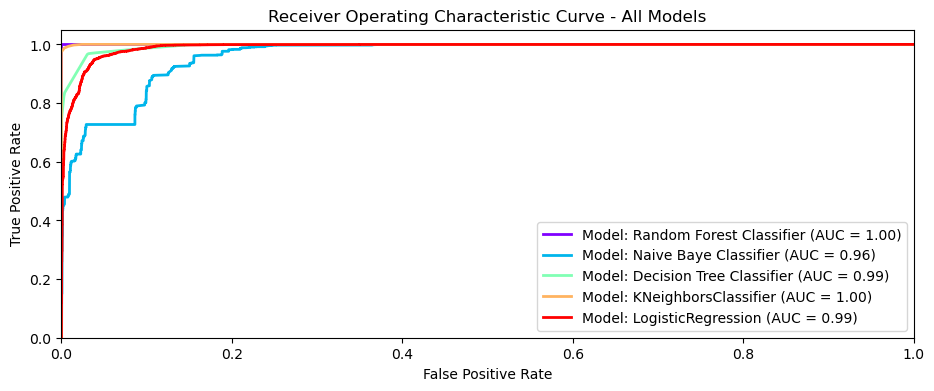

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Import roc_auc_score

#models.append(('SequentialDL', SequentialDL))
Y_train_ECD=lb.fit_transform(Y_train)
Y_test_ECD=lb.fit_transform(Y_test)
# Assuming models is a list of tuples containing model names and corresponding models
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))

plt.figure()
for (i, v), color in zip(models, colors):
    scores = cross_val_score(v, X_train, Y_train_ECD, cv=10)
    temp=v.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train_ECD, lb.fit_transform(temp))

    # Assuming your model has a predict_proba method
    y_probs = v.predict_proba(X_train)[:, 1]  # Use the positive class probabilities
    fpr, tpr, thresholds = roc_curve(Y_train, y_probs)
    auc_score = auc(fpr, tpr)
    # Plot ROC curve with a unique color for each model
    plt.plot(fpr, tpr, lw=2, label=f'Model: {i} (AUC = {auc_score:.2f})', color=color)

    print(f"Model: {i}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC Score: {auc_score}")
    print("Cross-Validation Scores:")
    print(scores)
    print("\n")    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - All Models')
plt.legend(loc='lower right')
plt.show()